In [3]:
import pandas as pd 
import numpy as np
import openpyxl
import yfinance as yf
from datetime import datetime, timedelta

# Here i will put all of the external data I used in the model:

## 1 . CPI,PPI,NONFARM,FOMC

In [47]:
import pandas as pd
# Load the Excel file with multiple sheets into a dictionary of DataFrames

sheets_dict = pd.read_excel('act vs forecast.xlsx', sheet_name=None)

# Extract each sheet into separate DataFrames
df1 = sheets_dict[list(sheets_dict.keys())[0]]
df2 = sheets_dict[list(sheets_dict.keys())[1]]
df3 = sheets_dict[list(sheets_dict.keys())[2]]
df4 = sheets_dict[list(sheets_dict.keys())[3]]
df5 = sheets_dict[list(sheets_dict.keys())[4]]
df6 = sheets_dict[list(sheets_dict.keys())[5]]
df7 = sheets_dict[list(sheets_dict.keys())[6]]

# Optional: print sheet names to verify
print("Sheet names:", list(sheets_dict.keys()))

Sheet names: ['GDP', 'nonfarm', 'CPI', 'PPI', 'unemployment rate', 'core_PCE', 'FOMC']


In [48]:
# arrange the dates
for df in [df1, df2, df3, df4, df5,df6,df7]:
    #df = df.drop('Time', axis=1)
    df['Release Date'] = df['Release Date'].str.replace(r"\s*\(.*\)", "", regex=True)  # remove (anything)
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')
    df['Release Date'] = df['Release Date'].dt.date

df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release Date       126 non-null    object 
 1   Time               126 non-null    object 
 2   Actual_core_PCE    125 non-null    float64
 3   Forecast_core_PCE  119 non-null    float64
 4   Previous_core_PCE  126 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.0+ KB


In [49]:
#move the time column
df1.drop('Time', axis=1, inplace=True)
df2.drop('Time', axis=1, inplace=True)
df3.drop('Time', axis=1, inplace=True)
df4.drop('Time', axis=1, inplace=True)
df5.drop('Time', axis=1, inplace=True)
df6.drop('Time', axis=1, inplace=True)
df7.drop('Time', axis=1, inplace=True)


In [50]:
# when using a loop it does not work
# Convert 'Release Date' to datetime format for each DataFrame
df1['Release Date'] = pd.to_datetime(df1['Release Date'])
df2['Release Date'] = pd.to_datetime(df2['Release Date'])
df3['Release Date'] = pd.to_datetime(df3['Release Date'])
df4['Release Date'] = pd.to_datetime(df4['Release Date'])
df5['Release Date'] = pd.to_datetime(df5['Release Date'])
df6['Release Date'] = pd.to_datetime(df6['Release Date'])
df7['Release Date'] = pd.to_datetime(df7['Release Date'])
df7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Release Date   145 non-null    datetime64[ns]
 1   Actual_FOMC    139 non-null    float64       
 2   Forecast_FOMC  135 non-null    float64       
 3   Previous_FOMC  140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.7 KB


In [51]:
for df in [df1, df2, df3, df4, df5,df6,df7]:
    df.rename(columns={'Release Date': 'ds'}, inplace=True)

df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             145 non-null    datetime64[ns]
 1   Actual_FOMC    139 non-null    float64       
 2   Forecast_FOMC  135 non-null    float64       
 3   Previous_FOMC  140 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.7 KB


In [76]:

from functools import reduce

# Suppose your seven DataFrames are:
# df1, df2, df3, df4, df5, df6, df7
dfs = [df1, df2, df3, df4, df5, df6, df7]

# Merge all of them on “ds” using an outer join
merged_df = reduce(
    lambda left, right: pd.merge(left, right, on="ds", how="outer"),
    dfs
)
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          973 non-null    datetime64[ns]
 1   Actual_GDP                  204 non-null    float64       
 2   Forecast_GDP                204 non-null    float64       
 3   Previous_GDP                205 non-null    float64       
 4   Actual_nonfarm              206 non-null    object        
 5   Forecast_nonfarm            206 non-null    object        
 6   Previous_nonfarm            206 non-null    object        
 7   Actual_CPI                  155 non-null    float64       
 8   Forecast_CPI                156 non-null    float64       
 9   Previous_CPI                156 non-null    float64       
 10  Actual_PPI                  170 non-null    float64       
 11  Forecast_PPI                156 non-null    float64       

,ds,Actual_GDP,Forecast_GDP,Previous_GDP,Actual_CPI,Forecast_CPI,Previous_CPI,Actual_PPI,Forecast_PPI,Previous_PPI,Actual_unemployment rate,Forecast_unemployment rate,Previous_unemployment rate,Actual_core_PCE,Forecast_core_PCE,Previous_core_PCE,Actual_FOMC,Forecast_FOMC,Previous_FOMC
count,973,204.000000,204.000000,205.000000,155.000000,156.000000,156.000000,170.000000,156.000000,171.000000,201.000000,201.000000,201.000000,125.000000,119.000000,126.000000,139.000000,135.000000,140.000000
mean,2017-10-14 21:00:55.498458368,0.020015,0.019814,0.019654,0.026161,0.026026,0.026160,0.025388,0.024231,0.025585,0.060055,0.060886,0.060124,0.024096,0.024496,0.024151,0.013813,0.013889,0.013929
min,2008-02-28 00:00:00,-0.329000,-0.341000,-0.329000,-0.002000,-0.001000,-0.002000,-0.016000,-0.014000,-0.016000,0.034000,0.034000,0.034000,0.009000,0.009000,0.010000,0.002500,0.002500,0.002500
25%,2014-02-20 00:00:00,0.013000,0.012750,0.012000,0.014500,0.015000,0.014750,0.009000,0.008000,0.009000,0.040000,0.039000,0.040000,0.015000,0.015000,0.015000,0.002500,0.002500,0.002500
50%,2018-01-12 00:00:00,0.023000,0.024000,0.022000,0.020000,0.020000,0.020000,0.020000,0.018000,0.020000,0.053000,0.053000,0.053000,0.017000,0.018000,0.018000,0.002500,0.002500,0.002500
75%,2021-10-01 00:00:00,0.031250,0.030000,0.032000,0.030000,0.030000,0.030000,0.030750,0.027250,0.030500,0.079000,0.079000,0.079000,0.031000,0.033500,0.030500,0.020000,0.020000,0.020000
max,2025-12-10 00:00:00,0.334000,0.332000,0.334000,0.091000,0.088000,0.091000,0.113000,0.109000,0.115000,0.147000,0.197000,0.147000,0.054000,0.055000,0.053000,0.055000,0.055000,0.055000
std,NaN,0.060655,0.060460,0.060593,0.020843,0.020460,0.020779,0.027706,0.028102,0.027861,0.022982,0.025088,0.022964,0.012617,0.012735,0.012627,0.016927,0.017179,0.016922


In [77]:
#Optional 
merged_df.fillna("none event", inplace=True)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          973 non-null    datetime64[ns]
 1   Actual_GDP                  973 non-null    object        
 2   Forecast_GDP                973 non-null    object        
 3   Previous_GDP                973 non-null    object        
 4   Actual_nonfarm              973 non-null    object        
 5   Forecast_nonfarm            973 non-null    object        
 6   Previous_nonfarm            973 non-null    object        
 7   Actual_CPI                  973 non-null    object        
 8   Forecast_CPI                973 non-null    object        
 9   Previous_CPI                973 non-null    object        
 10  Actual_PPI                  973 non-null    object        
 11  Forecast_PPI                973 non-null    object        

C:\Users\OMER\AppData\Local\Temp\ipykernel_45692\4125599878.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'none event' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_df.fillna("none event", inplace=True)


In [78]:

events = ['CPI', 'GDP', 'PPI','nonfarm','unemployment rate','core_PCE','FOMC']  # Add your full event list

def clean_value(val):
    if val == 'none event' or pd.isna(val):
        return np.nan
    #try:
    val = str(val).replace(',', '')
    val = str(val).replace('K', '')  # Remove 'K'
    return float(val)
    #except:
     #   return np.nan


for event in events:
    actual_col = f'Actual_{event}'
    forecast_col = f'Forecast_{event}'
    previous_col = f'Previous_{event}'

    # Columns to be created
    vs_forecast_col = f'{event}_vs_forecast'
    vs_previous_col = f'{event}_vs_previous'

    def compare_values(a, b):
        a = clean_value(a)
        b = clean_value(b)
    
        if pd.isna(a) or pd.isna(b):
            return np.nan
        return 1 if a > b else -1 if a < b else 0


     # Apply for forecast
    merged_df[vs_forecast_col] = merged_df[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)

    # Apply for previous
    merged_df[vs_previous_col] = merged_df[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)



merged_df.info()

C:\Users\OMER\AppData\Local\Temp\ipykernel_45692\1001873201.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_df[vs_forecast_col] = merged_df[[actual_col, forecast_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45692\1001873201.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  merged_df[vs_previous_col] = merged_df[[actual_col, previous_col]].apply(lambda row: compare_values(row[0], row[1]), axis=1)
C:\Users\OMER\AppData\Local\Temp\ipykernel_45692\1001873201.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             973 non-null    datetime64[ns]
 1   Actual_GDP                     973 non-null    object        
 2   Forecast_GDP                   973 non-null    object        
 3   Previous_GDP                   973 non-null    object        
 4   Actual_nonfarm                 973 non-null    object        
 5   Forecast_nonfarm               973 non-null    object        
 6   Previous_nonfarm               973 non-null    object        
 7   Actual_CPI                     973 non-null    object        
 8   Forecast_CPI                   973 non-null    object        
 9   Previous_CPI                   973 non-null    object        
 10  Actual_PPI                     973 non-null    object        
 11  Forecast_PPI       

In [79]:
# Handle object columns that should be numeric
#for col in merged_df.select_dtypes(include=['object']).columns:
    #merged_df[col] = merged_df[col].astype(float, errors='ignore')

# create a column to identify events returns nan if there is no event in that day

lst_cols =['Actual_GDP','Actual_nonfarm','Actual_CPI','Actual_PPI','Actual_unemployment rate','Actual_core_PCE','Actual_FOMC']
def identify_events(row):
    events = [col for col in lst_cols if row[col] != 'none event']
    return ', '.join(events) if events else np.nan

merged_df['event'] = merged_df.apply(identify_events, axis=1)

merged_df['event'].head(20)

0                                   Actual_GDP
1                               Actual_nonfarm
2                                  Actual_FOMC
3                                   Actual_GDP
4                               Actual_nonfarm
5                      Actual_GDP, Actual_FOMC
6                               Actual_nonfarm
7                               Actual_nonfarm
8                                  Actual_FOMC
9                                   Actual_GDP
10                              Actual_nonfarm
11                                  Actual_GDP
12    Actual_nonfarm, Actual_unemployment rate
13                                 Actual_FOMC
14                                  Actual_GDP
15    Actual_nonfarm, Actual_unemployment rate
16                                 Actual_FOMC
17                                  Actual_GDP
18    Actual_nonfarm, Actual_unemployment rate
19                                 Actual_FOMC
Name: event, dtype: object

In [61]:
merged_df.head()

,ds,Actual_GDP,Forecast_GDP,Previous_GDP,Actual_nonfarm,Forecast_nonfarm,Previous_nonfarm,Actual_CPI,Forecast_CPI,Previous_CPI,...,PPI_vs_previous,nonfarm_vs_forecast,nonfarm_vs_previous,unemployment rate_vs_forecast,unemployment rate_vs_previous,core_PCE_vs_forecast,core_PCE_vs_previous,FOMC_vs_forecast,FOMC_vs_previous,event
0,2008-02-28,0.006,0.007,0.006,none event,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Actual_GDP
1,2008-03-07,none event,none event,none event,-63K,25K,-17K,none event,none event,none event,...,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,Actual_nonfarm
2,2008-03-18,none event,none event,none event,none event,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,Actual_FOMC
3,2008-03-27,0.006,0.006,0.006,none event,none event,none event,none event,none event,none event,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Actual_GDP
4,2008-04-04,none event,none event,none event,-80K,-50K,-63K,none event,none event,none event,...,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,Actual_nonfarm


In [80]:
#merged_df.info()
#drop all of the forecast and previous columns but not the vs_forecast and vs_previous columns
cols_to_drop = [col for col in merged_df.columns if 'Forecast' in col or 'Previous' in col]
lst = ['CPI', 'GDP', 'PPI','nonfarm','unemployment rate','core_PCE','FOMC'] 
#for data in lst:
#    cols_to_drop.remove(f'{data}_vs_forecast')
#    cols_to_drop.remove(f'{data}_vs_previous')  
#print("Columns to drop:", cols_to_drop)
merged_df.drop(columns=cols_to_drop, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             973 non-null    datetime64[ns]
 1   Actual_GDP                     973 non-null    object        
 2   Actual_nonfarm                 973 non-null    object        
 3   Actual_CPI                     973 non-null    object        
 4   Actual_PPI                     973 non-null    object        
 5   Actual_unemployment rate       973 non-null    object        
 6   Actual_core_PCE                973 non-null    object        
 7   Actual_FOMC                    973 non-null    object        
 8   CPI_vs_forecast                155 non-null    float64       
 9   CPI_vs_previous                155 non-null    float64       
 10  GDP_vs_forecast                204 non-null    float64       
 11  GDP_vs_previous    

In [ ]:
# handle the 'none event' :
merged_df.replace('none event', np.nan, inplace=True)

## Add israeli holidays (ecatianly during jewsh holidays the market is come )

In [81]:
isr_holidays = pd.read_csv(r'C:\Users\OMER\Downloads\Jewish_Israeli_holidays.csv')
isr_holidays.info()
isr_holidays['date'] = pd.to_datetime(isr_holidays['date'], format='%m/%d/%Y')

isr_holidays.rename(columns={'date': 'ds','eng_name':'holiday'}, inplace=True)
isr_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1050 non-null   object
 1   eng_name  1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       1050 non-null   datetime64[ns]
 1   holiday  1050 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 16.5+ KB


### Merge with the economic data df

In [82]:
merged_df = pd.merge(merged_df, isr_holidays, on='ds', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             973 non-null    datetime64[ns]
 1   Actual_GDP                     973 non-null    object        
 2   Actual_nonfarm                 973 non-null    object        
 3   Actual_CPI                     973 non-null    object        
 4   Actual_PPI                     973 non-null    object        
 5   Actual_unemployment rate       973 non-null    object        
 6   Actual_core_PCE                973 non-null    object        
 7   Actual_FOMC                    973 non-null    object        
 8   CPI_vs_forecast                155 non-null    float64       
 9   CPI_vs_previous                155 non-null    float64       
 10  GDP_vs_forecast                204 non-null    float64       
 11  GDP_vs_previous    

## Add pe ratio for stocks 

In [83]:
pe = pd.read_csv('pe-ratio.csv')
pe = pe.iloc[1:]
pe['date'] = pd.to_datetime(pe['date'])
pe.rename(columns={'date': 'ds'}, inplace=True)
# Remove by column name, in-place
pe.drop(columns=["Unnamed: 3"], inplace=True)

pe.info()   
#pe['month'] = pe['date'].dt.month
#pe['year'] = pe['date'].dt.year
#pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 1 to 340
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         331 non-null    datetime64[ns]
 1   shiler pe  331 non-null    object        
 2   PE         340 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 8.1+ KB


In [84]:
pe[['ds','PE']].tail(25)
for col in ['PE', 'shiler pe']:  # replace with your actual column names
    pe[col] = (
        pe[col]
        .astype(str)                    # ensure string type
        .str.replace(r'[^\d\.\-]', '', regex=True)  # remove all but digits, dot, minus
        .str.strip()                    # remove leading/trailing whitespace
    )
    pe[col] = pd.to_numeric(pe[col], errors='coerce')


pe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 1 to 340
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         331 non-null    datetime64[ns]
 1   shiler pe  331 non-null    float64       
 2   PE         340 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.1 KB


### Merge

In [87]:
merged_df = pd.merge(merged_df, pe[['shiler pe','ds']], on='ds', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ds                             973 non-null    datetime64[ns]
 1   Actual_GDP                     973 non-null    object        
 2   Actual_nonfarm                 973 non-null    object        
 3   Actual_CPI                     973 non-null    object        
 4   Actual_PPI                     973 non-null    object        
 5   Actual_unemployment rate       973 non-null    object        
 6   Actual_core_PCE                973 non-null    object        
 7   Actual_FOMC                    973 non-null    object        
 8   CPI_vs_forecast                155 non-null    float64       
 9   CPI_vs_previous                155 non-null    float64       
 10  GDP_vs_forecast                204 non-null    float64       
 11  GDP_vs_previous    

In [92]:
merged_df['holiday'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: holiday, dtype: object

## Add reasury yields auctions :

In [93]:
import openpyxl
sheets_dict = pd.read_excel('treasury_auctions.xlsx', sheet_name=None)
# Extract each sheet into separate DataFrames
df1 = sheets_dict[list(sheets_dict.keys())[0]]
df2 = sheets_dict[list(sheets_dict.keys())[1]]
df3 = sheets_dict[list(sheets_dict.keys())[2]]

# Optional: print sheet names to verify
print("Sheet names:", list(sheets_dict.keys()))

Sheet names: ['20year_auction', '10year_auction', '2year_auction']


In [94]:
for df in [df1, df2, df3]:
    #df = df.drop('Time', axis=1)
    # 1) Make the first row into the header
    #df.columns = df.iloc[0]
    # 2) Remove that row from the body of the DataFrame
    #df = df.iloc[1:].reset_index(drop=True)
    df['Release Date'] = df['Release Date'].str.replace(r"\s*\(.*\)", "", regex=True)  # remove (anything)
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%b %d, %Y')
    df['Release Date'] = df['Release Date'].dt.date
    df.rename(columns={'Release Date': 'ds'}, inplace=True)  # rename for consistency

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ds        60 non-null     object 
 1   Actual    60 non-null     float64
 2   Previous  60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [95]:
# add a column for the gap between the previews to the actual
# also add a sign column if the auctionj was greater or less than the previous
lst = [(df1,'20year'), (df2,'10year'), (df3,'2year')]
def auction_gap(lst):
    for df, label in lst:
        df['ds'] = df['ds'].astype('datetime64[ns]')
        df[f'{label}_gap'] = df['Actual'] - df['Previous']
        df[f'{label}_gap'] = df[f'{label}_gap'].fillna(0)
        df.rename(columns={'Actual': f'Actual_{label}'}, inplace=True)
        df[f'{label}_sign'] = np.where(df[f'{label}_gap'] > 0, 1, np.where(df[f'{label}_gap'] < 0, -1, 0))
        df[f'{label}_gap'] = df[f'{label}_gap'].astype(float)

    return df1, df2, df3
df1, df2, df3 = auction_gap(lst)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             60 non-null     datetime64[ns]
 1   Actual_20year  60 non-null     float64       
 2   Previous       60 non-null     float64       
 3   20year_gap     60 non-null     float64       
 4   20year_sign    60 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 2.5 KB


In [91]:
for df in [df1, df2, df3]:
    df.drop(columns=['Previous'], inplace=True, errors='ignore')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ds             174 non-null    datetime64[ns]
 1   Actual_10year  174 non-null    float64       
 2   10year_gap     174 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.2 KB


# Stock data 

In [1]:
start = "2017-01-01"
end = "2025-04-17" #04

In [8]:
#aapl = yf.download("AAPL", start=start, end=end)
#print(data.tail())
SPY = yf.download("^GSPC", start=start, end=end)[['Close', 'Volume','High','Low','Open']]
  
#SPY = yf.download("SPY", start=start, end=end, group_by='column')
#SPY = SPY[['Adj Close', 'Volume', 'High', 'Low']]
#SPY = SPY[["Adj Close"]].rename(columns={"Adj Close": "SPX_Close"})
SPY.columns = ['SPY_Close', 'SPY_Volume', 'SPY_High', 'SPY_Low', 'SPY_Open']
print(SPY.tail())
#BIT = yf.download("GLD", start=start,end=end)

[*********************100%***********************]  1 of 1 completed

              SPY_Close  SPY_Volume     SPY_High      SPY_Low     SPY_Open
Date                                                                      
2025-04-10  5268.049805  6677140000  5353.149902  5115.270020  5353.149902
2025-04-11  5363.359863  5602550000  5381.459961  5220.770020  5255.560059
2025-04-14  5405.970215  5031440000  5459.459961  5358.020020  5441.959961
2025-04-15  5396.629883  4317110000  5450.410156  5386.439941  5411.990234
2025-04-16  5275.700195  4607750000  5367.240234  5220.790039  5335.750000


# Ploting the data 

In [10]:
SPY.describe()

,SPY_Close,SPY_Volume,SPY_High,SPY_Low,SPY_Open
count,2084.000000,2.084000e+03,2084.000000,2084.000000,2084.000000
mean,3749.733494,4.098762e+09,3769.876281,3726.943741,3749.239641
std,1037.187114,1.022827e+09,1042.581315,1031.224441,1037.167492
min,2237.399902,0.000000e+00,2263.879883,2191.860107,2251.570068
25%,2809.465027,3.479835e+09,2823.779968,2795.102417,2810.217407
50%,3768.359985,3.884090e+09,3802.185059,3730.199951,3765.844971
75%,4441.854980,4.467220e+09,4460.602417,4415.387451,4441.222656
max,6144.149902,9.976520e+09,6147.430176,6111.149902,6134.500000


In [19]:
df_mpf = SPY.rename(columns={
  'SPY_Open':  'Open',
  'SPY_High':  'High',
  'SPY_Low':   'Low',
  'SPY_Close': 'Close',
  'SPY_Volume':'Volume'
})


c:\Users\OMER\PycharmProjects\Project\.venv\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


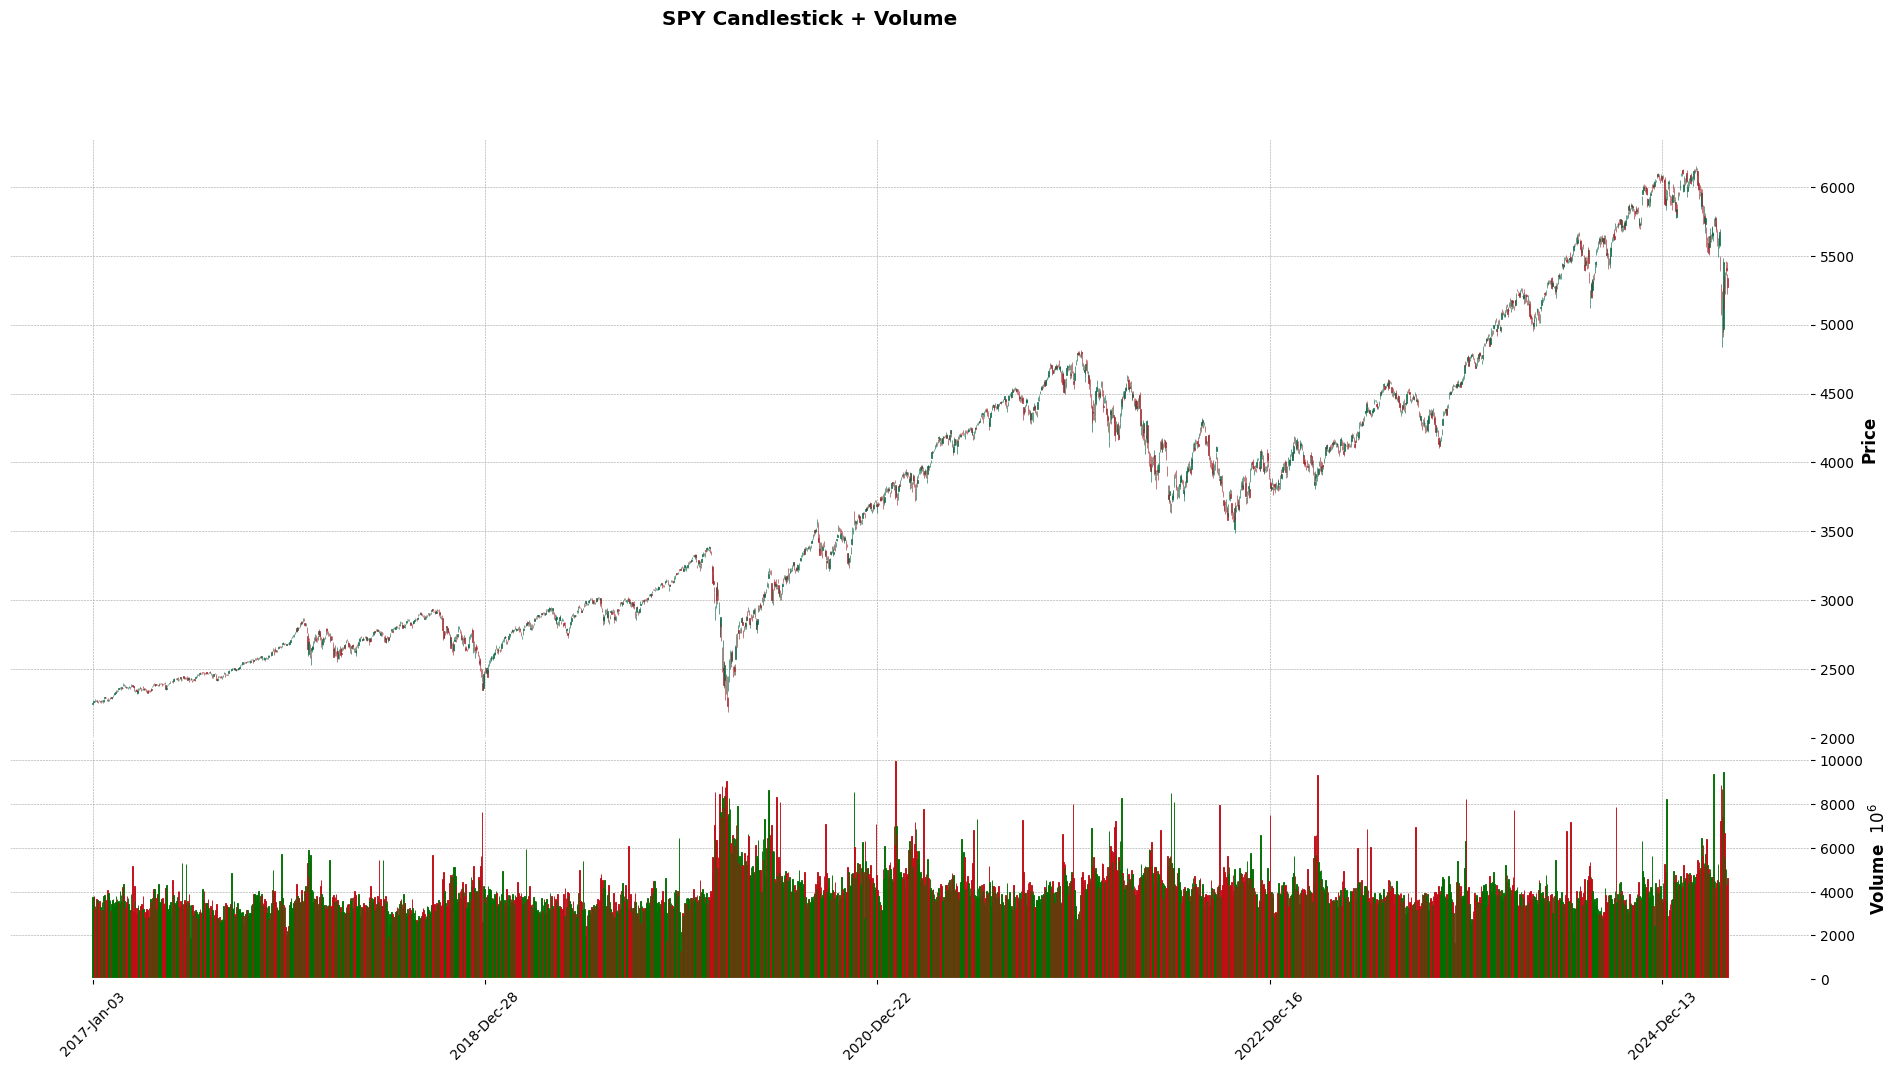

In [22]:
import mplfinance as mpf

mpf.plot(
  df_mpf,
  type='candle',
  volume=True,
  style='charles',
  title='SPY Candlestick + Volume',
  figsize=(25, 12) 
)


In [26]:
return_data.head(20)

,QQQ_Close,^RUT,^VIX,EMA_20,^GDAXI,MSFT,stdev_5,^FTSE,GOOG,AAPL,...,DX-Y.NYB,EUR=X,avgreturn10d,2Y_Yield,EUR,SPY_RSI,DXY,JPY,ds,SPY_return
0,-0.043024,-0.296631,1.993072,-0.006206,-0.725528,0.350635,0.316581,-0.655697,1.775112,0.066658,...,-0.575734,-0.504204,-0.051509,-3.333333,0.93338,54.669773,100.160004,113.809998,2017-01-23,-0.269012
1,0.864767,1.585499,-5.947330,0.056868,0.426048,0.889458,0.424201,-0.012591,0.556575,-0.091620,...,0.189691,-0.437121,0.049623,4.310345,0.92930,61.857468,100.349998,112.779999,2017-01-24,0.656459
2,0.988757,0.966249,-2.348684,0.128274,1.820703,0.251904,0.528980,0.197196,1.432266,1.592078,...,-0.318884,0.299146,0.129884,1.652893,0.93208,63.926955,100.029999,113.839996,2017-01-25,0.802609
3,-0.020502,-0.494775,-1.665128,0.108820,0.360663,0.926479,0.459317,-0.040477,-0.421220,0.049234,...,0.349894,-0.216713,0.094234,-1.626016,0.93006,63.965540,100.379997,113.292999,2017-01-26,-0.073538
4,0.099017,-0.356210,-0.470369,0.090012,-0.289994,2.349481,0.486897,0.321162,-1.062304,0.008170,...,0.149434,0.646194,0.107017,0.826446,0.93607,59.510150,100.529999,114.455002,2017-01-27,-0.086646
5,-0.831508,-1.340191,12.287336,0.023644,-1.120508,-0.988134,0.581326,-0.918644,-2.549482,-0.262374,...,-0.099471,-0.289513,0.028423,0.000000,0.93336,56.071596,100.430000,114.667999,2017-01-30,-0.600954
6,0.019240,0.701751,0.925923,0.012892,-1.254763,-0.736991,0.506387,-0.271122,-0.689241,-0.230199,...,-0.916059,0.050360,0.049199,-2.459016,0.93383,54.943062,99.510002,113.650002,2017-01-31,-0.088991
7,0.496187,-0.043322,-1.501246,0.014508,1.076611,-1.655074,0.249146,0.119732,-0.137429,6.098040,...,0.130637,-0.881320,0.034546,2.521008,0.92560,52.223722,99.639999,112.742996,2017-02-01,0.029836
8,-0.114303,-0.279154,1.016087,0.018564,-0.270593,-0.644847,0.267195,0.465687,0.356295,-0.170875,...,0.210758,0.338161,0.076342,-0.819672,0.92873,55.686728,99.849998,113.310997,2017-02-02,0.057031
9,0.542384,1.503570,-8.046941,0.086103,0.202444,0.807349,0.473796,0.665192,0.370687,0.427937,...,0.020034,0.052761,0.115327,0.000000,0.92922,60.962463,99.870003,112.789001,2017-02-03,0.726476


### STD of each day 

In [23]:
# Compute daily std‐deviation of [Open, High, Low, Close]
SPY['daily_OHLC_std'] = SPY[['SPY_Open', 'SPY_High', 'SPY_Low', 'SPY_Close']].std(axis=1)

# Inspect the first few values
print(SPY[['SPY_Open', 'SPY_High', 'SPY_Low', 'SPY_Close', 'daily_OHLC_std']].head())


               SPY_Open     SPY_High      SPY_Low    SPY_Close  daily_OHLC_std
Date                                                                          
2017-01-03  2251.570068  2263.879883  2245.129883  2257.830078        8.070795
2017-01-04  2261.600098  2272.820068  2261.600098  2270.750000        5.940694
2017-01-05  2268.179932  2271.500000  2260.449951  2269.000000        4.768865
2017-01-06  2271.139893  2282.100098  2264.060059  2276.979980        7.761764
2017-01-09  2273.590088  2275.489990  2268.899902  2268.899902        3.347435


In [29]:
SPY['daily_OHLC_std'].max()

np.float64(296.00446517132895)

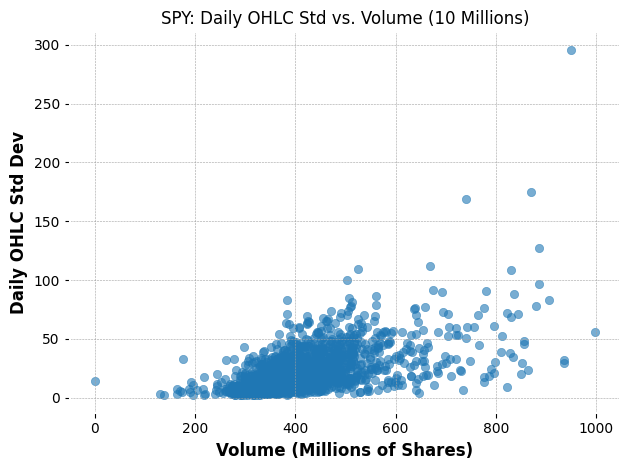

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Create a new column that expresses volume in millions of shares
SPY['Volume_in_Millions'] = SPY['SPY_Volume'] / 1e7

# 2) Plot using the rescaled column
sns.scatterplot(
    data=SPY,
    x='Volume_in_Millions',
    y='daily_OHLC_std',
    alpha=0.6,            # make points slightly transparent, if helpful
    edgecolor=None        # remove borders for large point sets
)
plt.xlabel('Volume (Millions of Shares)')
plt.ylabel('Daily OHLC Std Dev')
plt.title('SPY: Daily OHLC Std vs. Volume (10 Millions)')
plt.tight_layout()
plt.show()


### Add VIX :

In [30]:
#aapl = yf.download("AAPL", start=start, end=end)
#print(data.tail())
VIX = yf.download("^VIX", start=start, end=end)[['Close', 'Volume','High','Low','Open']]
  

VIX.columns = ['VIX_Close', 'VIX_Volume', 'VIX_High', 'VIX_Low', 'VIX_Open']
print(VIX.tail())
#BIT = yf.download("GLD", start=start,end=end)

[*********************100%***********************]  1 of 1 completed

            VIX_Close  VIX_Volume   VIX_High    VIX_Low   VIX_Open
Date                                                              
2025-04-10  40.720001           0  54.869999  34.439999  34.439999
2025-04-11  37.560001           0  46.119999  36.849998  40.799999
2025-04-14  30.889999           0  35.169998  29.750000  34.759998
2025-04-15  30.120001           0  31.450001  28.290001  30.010000
2025-04-16  32.639999           0  34.959999  29.480000  33.240002


In [31]:
SPY = SPY.join(VIX['VIX_Close'], how='left')

SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2017-01-03 to 2025-04-16
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SPY_Close           2084 non-null   float64
 1   SPY_Volume          2084 non-null   int64  
 2   SPY_High            2084 non-null   float64
 3   SPY_Low             2084 non-null   float64
 4   SPY_Open            2084 non-null   float64
 5   daily_OHLC_std      2084 non-null   float64
 6   Volume_in_Millions  2084 non-null   float64
 7   VIX_Close           2084 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 146.5 KB


# Volatility on return data

In [32]:
stocks = pd.read_pickle('combined_cleaned_add_with_QQQ.pkl')
return_data = pd.read_pickle('df_with_QQQ.pkl')

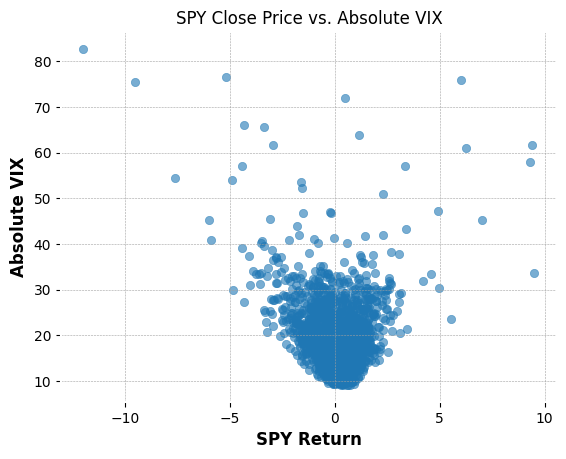

In [39]:
sns.scatterplot(data=return_data,x='SPY_return',y='abs_vix', alpha=0.6, edgecolor=None)
plt.xlabel('SPY Return')
plt.ylabel('Absolute VIX')
plt.title('SPY Close Price vs. Absolute VIX')
plt.show()